In [ ]:
# This script will compare buy & sells of a given stock relative to the price action, 
# It is designed to analyze when I bought & sold a stock (Daytrading) vs the price action. 
# April 2025

/var/folders/vv/lg2w1mmx79b93kh1fxk_v5p00000gn/T/ipykernel_50732/3096970113.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/vv/lg2w1mmx79b93kh1fxk_v5p00000gn/T/ipykernel_50732/3096970113.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Symbol,...,Status,Filled,Total Qty,Price,Avg Price,Time-in-Force,Placed Time,Filled Time,FilledTime_dt,FilledTime_dt_ny
0,2025-04-23 09:30:00-04:00,12.520000,13.520000,12.520000,13.500000,1060677,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,2025-04-23 09:31:00-04:00,13.450000,13.650000,13.030000,13.194300,81477,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,2025-04-23 09:32:00-04:00,13.000000,13.050000,12.550000,13.005000,186662,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,2025-04-23 09:33:00-04:00,13.025000,13.390000,12.750000,13.130000,112846,0.0,0.0,Cantor Equity Partners Inc-A,CEP,...,Filled,1.0,1.0,@13.24,13.24,GTC,04/23/2025 09:33:50 EDT,04/23/2025 09:33:50 EDT,2025-04-23 09:33:50,2025-04-23 09:33:50-04:00
4,2025-04-23 09:34:00-04:00,13.152600,13.400000,13.050100,13.057200,63885,0.0,0.0,Cantor Equity Partners Inc-A,CEP,...,Filled,1.0,1.0,@13.24,13.24,GTC,04/23/2025 09:33:50 EDT,04/23/2025 09:33:50 EDT,2025-04-23 09:33:50,2025-04-23 09:33:50-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2025-04-23 15:55:00-04:00,17.485001,17.700001,17.200001,17.309999,84435,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
386,2025-04-23 15:56:00-04:00,17.280001,17.413000,17.090000,17.160000,56276,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
387,2025-04-23 15:57:00-04:00,17.150000,17.200001,16.870001,17.010000,65430,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
388,2025-04-23 15:58:00-04:00,17.025000,17.070000,16.709999,16.730000,65284,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


/Users/stevensmith/Projects/python_virtual_envs/githubmatcher/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 33 rows containing missing values.


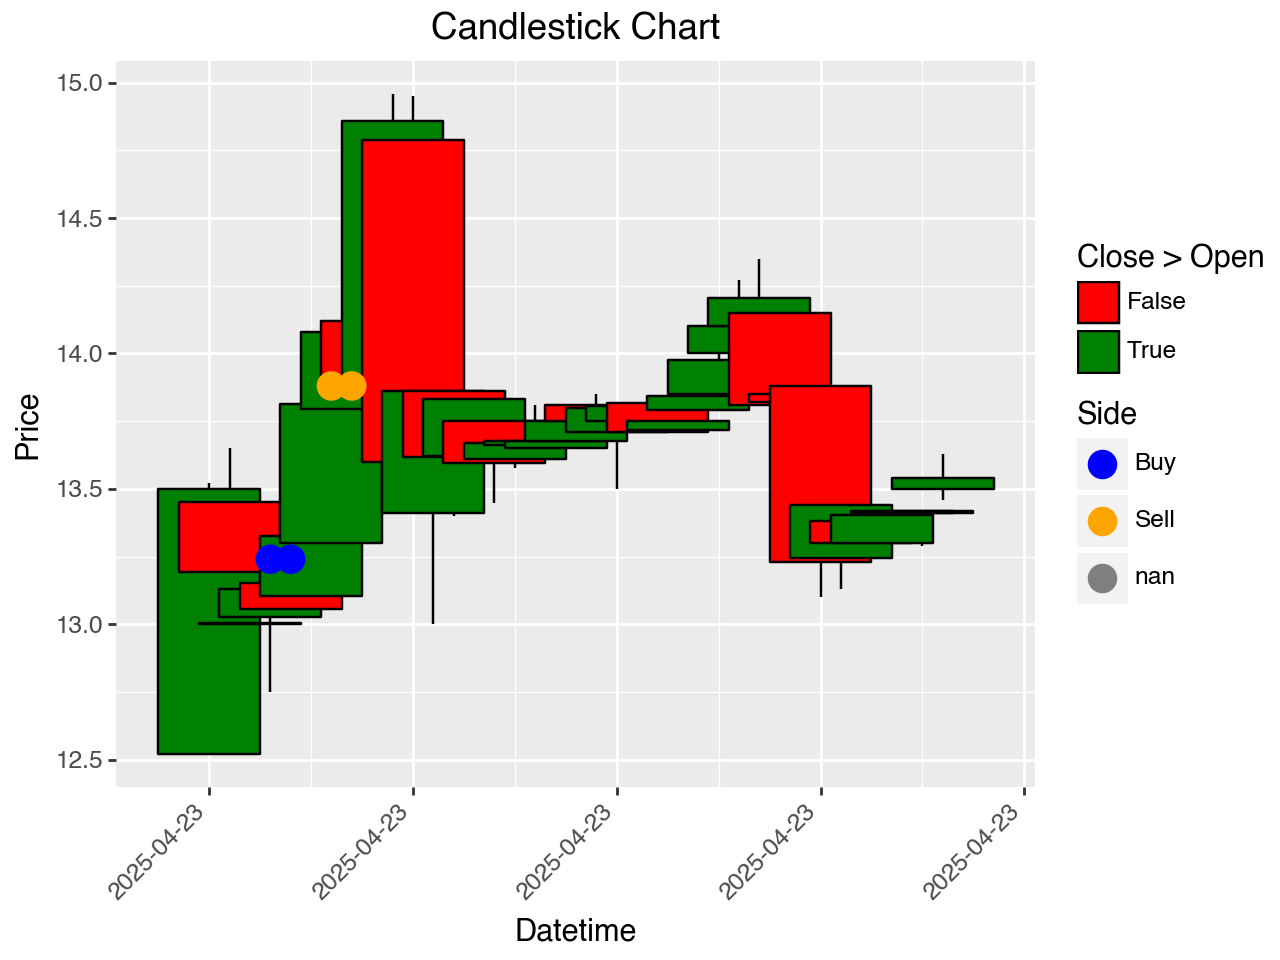

In [135]:
import pandas as pd
import plotnine as p9
import yfinance as yf


def get_stock_data(symbol, start_date, end_date, stock_interval="1m"):
    """
    Fetch historical stock data for a given symbol and date range.
    
    Parameters:
    - symbol (str): The stock symbol to fetch data for.
    - start_date (str): The start date in 'YYYY-MM-DD' format.
    - end_date (str): The end date in 'YYYY-MM-DD' format. 
    - stock_interval (str): The interval for the stock data (default is '1m'). TODO: data validation
    - e.g. '1m', '5m', '15m', '1h', '1d'.
    
    Returns:
    - pd.DataFrame: A DataFrame containing the historical stock data.
    """
    stock_data = yf.Ticker(symbol)
    stock_df = stock_data.history(period="1d", interval=stock_interval, start=start_date, end=end_date).reset_index()
    return stock_df

def combine_data(stock_df,order_df,stock_key='Datetime', order_key='FilledTime_dt_ny',direction='nearest',tol_interval="5m"):
    # Ensure both dataframes are sorted by time
    stock_dat = stock_df.sort_values(by=stock_key)
    filled_orders = order_df.sort_values(by=order_key)

    # Perform an asof merge to find the closest time
    merged_df = pd.merge_asof(
        stock_dat,
        filled_orders,
        left_on=stock_key,
        right_on=order_key,
        direction=direction,
        tolerance=pd.Timedelta(tol_interval)
    )

    return merged_df

def filter_data(data, universal_time_col='Datetime', filtering_time_col="FilledTime_dt_ny", time_buffer_minutes=10):
    """
    Filter the data to include rows within a time interval of +/- time_buffer_minutes.

    Parameters:
    - data (pd.DataFrame): The input DataFrame containing a time column.
    - time_column (str): The name of the time column in the DataFrame.
    - time_buffer_minutes (int): The number of minutes to extend the time range.

    Returns:
    - pd.DataFrame: A filtered DataFrame within the specified time interval.
    """
    min_time = data[filtering_time_col].min() - pd.Timedelta(minutes=time_buffer_minutes)
    max_time = data[filtering_time_col].max() + pd.Timedelta(minutes=time_buffer_minutes)
    return data[(data[universal_time_col] >= min_time) & (data[universal_time_col] <= max_time)]

import plotnine as p9

def generate_candlestick_plot(stock_order_df):
    """
    Generate a candlestick plot using plotnine.

    Parameters:
    - stock_order_df (pd.DataFrame): A DataFrame containing stock data with columns 'Datetime', 'Open', 'High', 'Low', and 'Close' and stock buy/sell orders.

    Returns:
    - plotnine.ggplot.ggplot: A candlestick plot.
    """
    candlestick_plot = (
        p9.ggplot(stock_order_df, p9.aes(x='Datetime')) +
        p9.geom_segment(p9.aes(x='Datetime', xend='Datetime', y='Low', yend='High'), color='black') +

        p9.geom_rect(
            p9.aes(
                xmin='Datetime - pd.Timedelta(minutes=2.5)', 
                xmax='Datetime + pd.Timedelta(minutes=2.5)', 
                ymin='Open', 
                ymax='Close', 
                fill='Close > Open'
            ),
            color='black'
        ) +
        p9.geom_point(p9.aes(x='Datetime', y='Avg Price',color="Side"),size=5)+
        p9.scale_fill_manual(values={True: 'green', False: 'red'}) +
        p9.scale_color_manual(values={"Buy": 'blue', "Sell": 'orange'}) +
        p9.labs(title="Candlestick Chart", x="Datetime", y="Price") +
        p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1))
    )
    return candlestick_plot

# Load the CSV file
order_records = pd.read_csv("~/Downloads/Webull_Orders_Records.csv")

# Filter rows where the 'status' column is 'Filled'
filled_orders = order_records[order_records['Status'] == 'Filled']
filled_orders['FilledTime_dt']=pd.to_datetime(filled_orders['Filled Time'].str.replace(" EDT",""), format="%m/%d/%Y %H:%M:%S")
filled_orders['FilledTime_dt_ny'] = filled_orders['FilledTime_dt'].dt.tz_localize('America/New_York')
#filled_orders.pivot(index=['Symbol', 'Placed Time'], columns='Side', values='Avg Price').reset_index()
selected_symbol = "CEP"
start_date = "2025-04-23"
end_date = "2025-04-24"
interval = "1m"
stock_dat = get_stock_data(selected_symbol, start_date=start_date, end_date=end_date, stock_interval=interval)

stock_order_df = combine_data(stock_dat, filled_orders[filled_orders['Symbol']==selected_symbol],tol_interval=interval)
display(stock_order_df)

generate_candlestick_plot(filter_data(stock_order_df, time_buffer_minutes=30))



In [133]:
filter_data(stock_order_df,time_column='FilledTime_dt_ny', time_buffer_minutes=60*24)

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Symbol,...,Status,Filled,Total Qty,Price,Avg Price,Time-in-Force,Placed Time,Filled Time,FilledTime_dt,FilledTime_dt_ny
3,2025-04-23 09:33:00-04:00,13.0250,13.39,12.7500,13.1300,112846,0.0,0.0,Cantor Equity Partners Inc-A,CEP,...,Filled,1.0,1.0,@13.24,13.24,GTC,04/23/2025 09:33:50 EDT,04/23/2025 09:33:50 EDT,2025-04-23 09:33:50,2025-04-23 09:33:50-04:00
4,2025-04-23 09:34:00-04:00,13.1526,13.40,13.0501,13.0572,63885,0.0,0.0,Cantor Equity Partners Inc-A,CEP,...,Filled,1.0,1.0,@13.24,13.24,GTC,04/23/2025 09:33:50 EDT,04/23/2025 09:33:50 EDT,2025-04-23 09:33:50,2025-04-23 09:33:50-04:00
6,2025-04-23 09:36:00-04:00,13.3000,13.95,13.3000,13.8143,110526,0.0,0.0,Cantor Equity Partners Inc-A,CEP,...,Filled,1.0,1.0,@13.88,13.88,GTC,04/23/2025 09:33:50 EDT,04/23/2025 09:36:55 EDT,2025-04-23 09:36:55,2025-04-23 09:36:55-04:00
7,2025-04-23 09:37:00-04:00,13.7956,14.45,13.6638,14.0800,167824,0.0,0.0,Cantor Equity Partners Inc-A,CEP,...,Filled,1.0,1.0,@13.88,13.88,GTC,04/23/2025 09:33:50 EDT,04/23/2025 09:36:55 EDT,2025-04-23 09:36:55,2025-04-23 09:36:55-04:00


In [129]:
stock_order_df['FilledTime_dt_ny']

0                           NaT
1                           NaT
2                           NaT
3     2025-04-23 09:33:50-04:00
4     2025-04-23 09:33:50-04:00
                 ...           
385                         NaT
386                         NaT
387                         NaT
388                         NaT
389                         NaT
Name: FilledTime_dt_ny, Length: 390, dtype: datetime64[ns, America/New_York]

/Users/stevensmith/Projects/python_virtual_envs/githubmatcher/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 73 rows containing missing values.


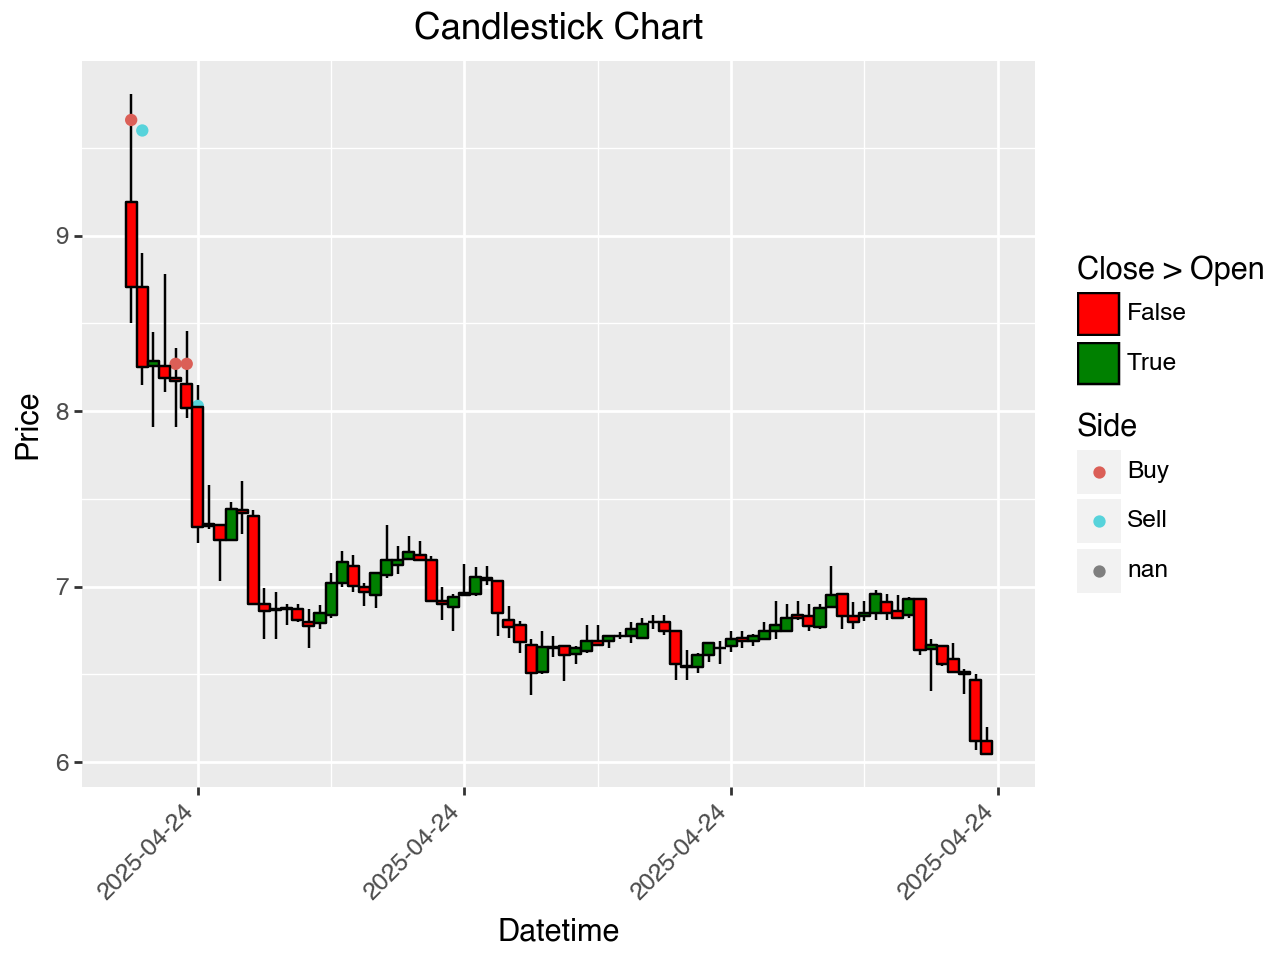

In [114]:
candlestick_plot = (
        p9.ggplot(stock_order_df, p9.aes(x='Datetime')) +
        p9.geom_segment(p9.aes(x='Datetime', xend='Datetime', y='Low', yend='High'), color='black') +
        p9.geom_point(p9.aes(x='Datetime', y='Avg Price',color="Side"))+
        p9.geom_rect(
            p9.aes(
                xmin='Datetime - pd.Timedelta(minutes=2.5)', 
                xmax='Datetime + pd.Timedelta(minutes=2.5)', 
                ymin='Open', 
                ymax='Close', 
                fill='Close > Open'
            ),
            color='black'
        ) +
        p9.scale_fill_manual(values={True: 'green', False: 'red'}) +
        p9.labs(title="Candlestick Chart", x="Datetime", y="Price") +
        p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1))
)
candlestick_plot